<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/ex0606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# セッション4 実践編： データセットの操作
Takenori Sakumura
last modified: 2023-06-06
Notes largely based on the class notes by Kenneth Tay (2018)


1. MASSパッケージをインストールし、ロードする。nlschools データセットをロードする。

In [2]:
library(MASS)
data(nlschools)

2. How can we find a description of the nlschools dataset? Use some of the functions we learned to get a feel for the data.
nlschools データセットの説明はどうすれば見つかるか？学習した関数のいくつかを使って、データの感触を掴んでみよう。



In [5]:
str(nlschools)
dim(nlschools)
?nlschools

'data.frame':	2287 obs. of  6 variables:
 $ lang : int  46 45 33 46 20 30 30 57 36 36 ...
 $ IQ   : num  15 14.5 9.5 11 8 9.5 9.5 13 9.5 11 ...
 $ class: Factor w/ 133 levels "180","280","1082",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GS   : int  29 29 29 29 29 29 29 29 29 29 ...
 $ SES  : int  23 10 15 23 10 10 23 10 13 15 ...
 $ COMB : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


[1] 2287    6

3. How many students are there in the dataset?
このデータセットには何人の生徒がいるか？


In [6]:
nrow(nlschools)

[1] 2287

4. How many students were there in each class? Which class had the most number of students?
各クラスには何人の生徒がいたか．どのクラスが一番人数が多かったか？



In [14]:
library(tidyverse)
nlschools %>% group_by(class) %>% summarise(n())

class,n()
<fct>,<int>
180,25
280,7
1082,5
1280,15
1580,8
1680,8
1880,24
2180,17
2480,24


In [21]:
length(table(nlschools$class))

[1] 133

In [23]:
nc <- table(nlschools$class)
which.max(nc)
nc[which.max(nc)]

15580 
   78

15580 
   33

In [24]:
nlschools %>% 
  group_by(class) %>% 
    summarise(ns = n()) %>% 
      arrange(desc(ns)) %>% head(1)

class,ns
<fct>,<int>
15580,33


5. Get a random sample of 10 rows from the dataset. (Hint: Look at the documentation for the sample_n function in the dplyr package.)
データセットから10行のランダムなサンプルを得よ．(ヒント: dplyrパッケージのsample_n関数のドキュメントを見る。)



In [25]:
?sample_n

In [33]:
nlschools %>% sample_n(size = 10, replace = FALSE)

lang,IQ,class,GS,SES,COMB
<int>,<dbl>,<fct>,<int>,<int>,<fct>
43,9.5,24380,15,20,1
55,13.5,17680,24,23,0
26,10.5,10980,33,15,0
31,10.5,20480,26,37,0
39,12.5,11880,29,45,1
35,10.0,19980,37,20,0
48,11.0,18480,29,43,0
30,9.5,180,29,23,0
38,10.5,9580,24,20,0


6. Make a scatterplot of IQ vs. lang.
IQ vs. lang の散布図を作成せよ．



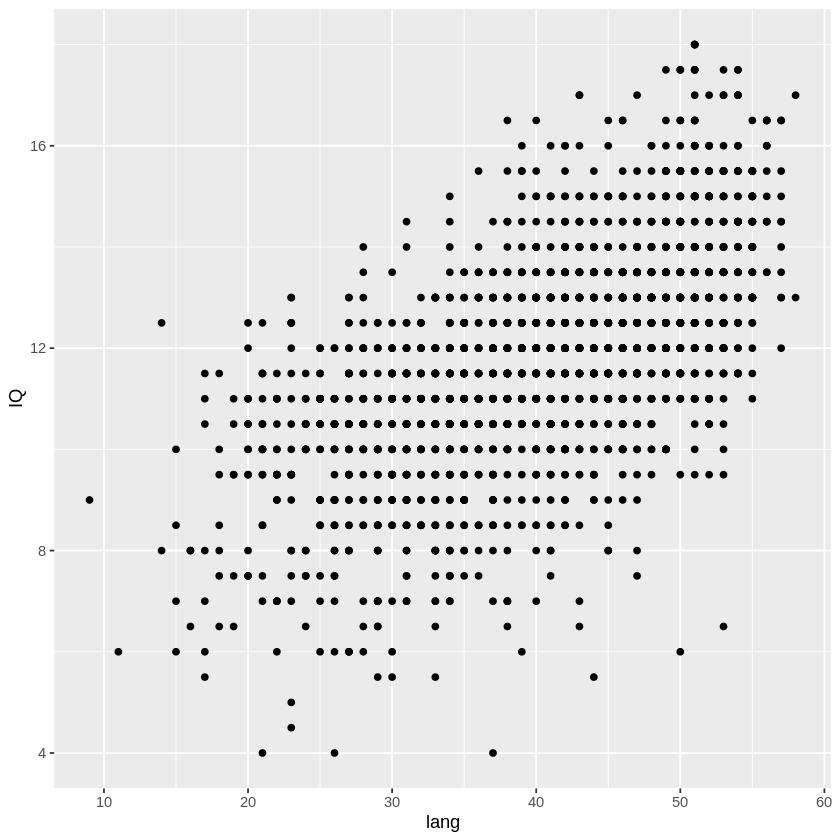

In [34]:
nlschools %>% ggplot(aes(x= lang, y=IQ)) + 
  geom_point()

7. There was a lot of overplotting in the previous scatterplot. Make the plot more readable by adding jitter and changing the alpha value of the points. What is the relationship between IQ and lang?
先ほどの散布図にはオーバープロットが多く見られた。ジッターを追加したり、点のアルファ値を変更したりして、プロットをより読みやすくせよ。IQとlangとの間にはどのような関係があるか？



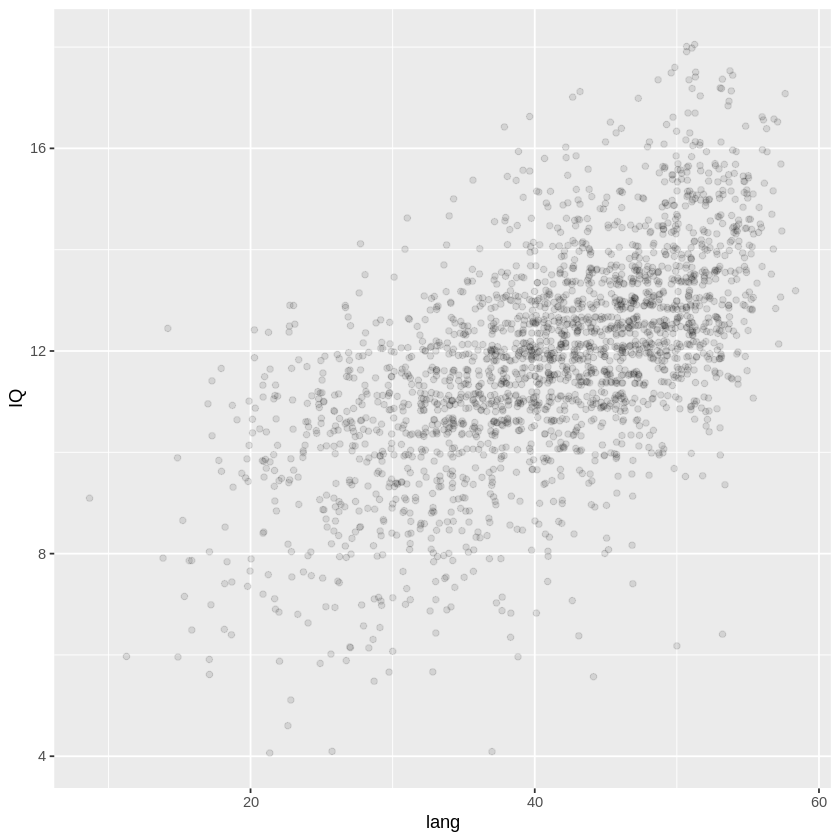

In [37]:
nlschools %>% ggplot(aes(x= lang, y=IQ)) + 
  geom_point(position = "jitter", alpha = 0.1)

8. What is the correlation between IQ and lang?
IQとlangとの間の相関関係はどうか？



In [38]:
nlschools %>% summarise(corr = cor(IQ, lang))

corr
<dbl>
0.6098195


9. Using the previous chart, color the points according to their value in the COMB column. Does the value of COMB affect the relationship between IQ and lang? What geometry could you add to the chart to check this?
先ほどのグラフを使い、COMB列の値に応じてポイントに色をつけよ。COMBの値は、IQとlangの関係に影響を与えるか？これを確認するために、チャートに何を追加できるか？



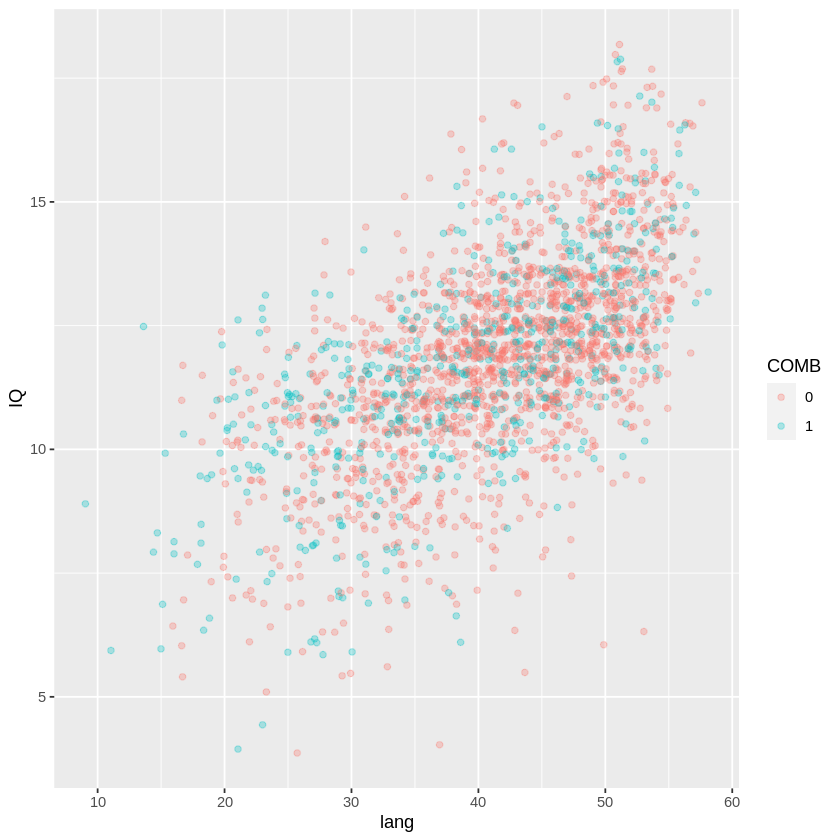

In [46]:
nlschools %>% ggplot(aes(x= lang, y=IQ, col=COMB)) + 
  geom_point(position = "jitter", alpha = 0.3)

傾向の違いを見るために，smooth 曲線を追加してみる．

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


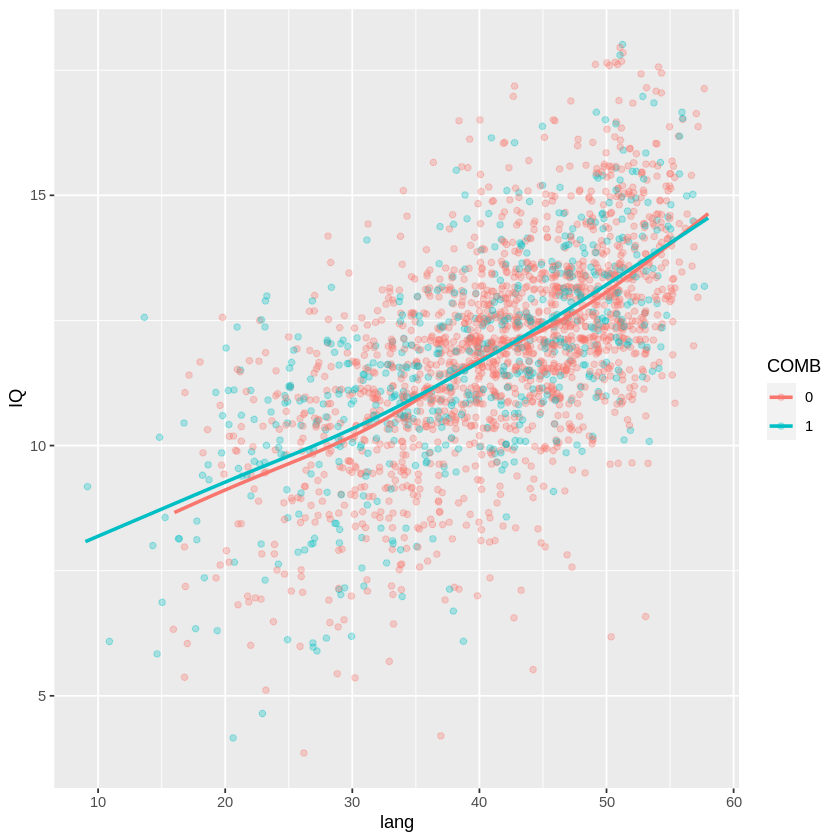

In [48]:
nlschools %>% ggplot(aes(x= lang, y=IQ, col=COMB)) + 
  geom_point(position = "jitter", alpha = 0.3) + 
    geom_smooth(se = FALSE)

10. There could be a strong relationship between IQ and social-economic stats (SES). Create a data frame which shows the mean IQ and language test scores of students for each SES value, and present the results in descending order of SES. IQとsocial-economic stats(SES)の間に強い関係がある可能性がある。SESの値ごとに生徒のIQと言語テストの平均点を示すデータフレームを作成し、その結果をSESの降順で表示せよ。

In [51]:
nlschools %>% group_by(SES) %>% summarise(mean_IQ = mean(IQ), mean_lt = mean(lang)) %>% arrange(desc(SES))

SES,mean_IQ,mean_lt
<int>,<dbl>,<dbl>
50,13.054264,46.64341
48,13.307692,48.84615
47,12.269231,45.28205
45,12.971154,44.73077
43,12.509091,44.69091
40,12.580556,44.35556
38,12.083333,41.66667
37,12.394737,43.19737
35,12.018750,43.51250


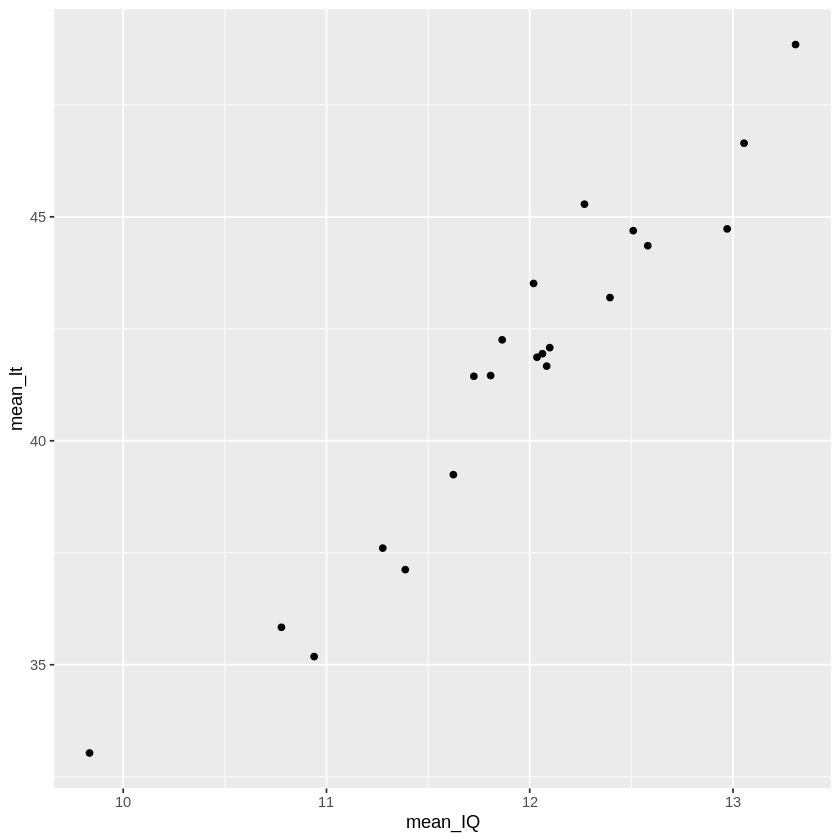

In [52]:
nlschools %>% group_by(SES) %>% summarise(mean_IQ = mean(IQ), mean_lt = mean(lang)) %>% 
  ggplot(aes(mean_IQ, mean_lt)) + geom_point()